<a href="https://colab.research.google.com/github/LeToyek/ML-Kelompok5-3H-Ceria-Cepat-Cendekiawan/blob/main/UTS-Maulana%20Arif%20Wijaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi Gambar dengan Clustering

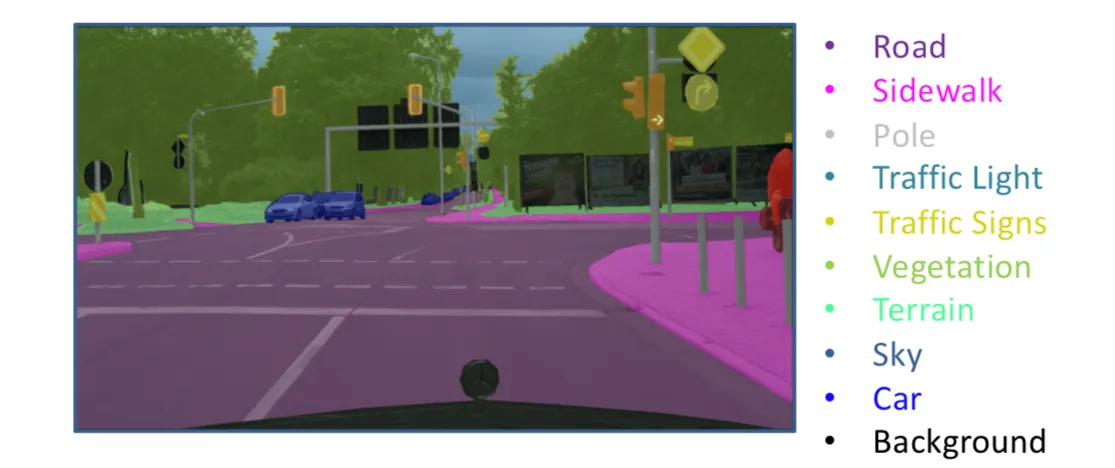

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

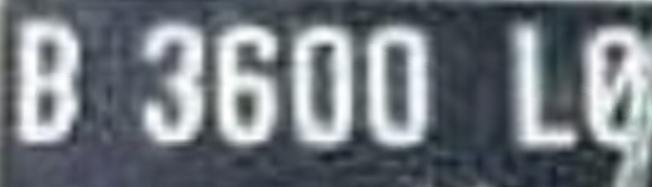

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import glob

cv_img = []

for img in glob.glob('/content/drive/MyDrive/dummy/*.jpg'):
  cv_img.append(img)

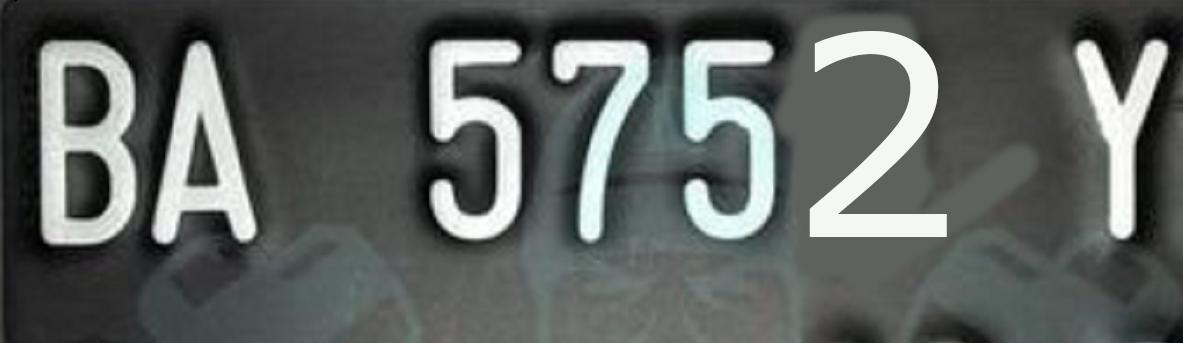

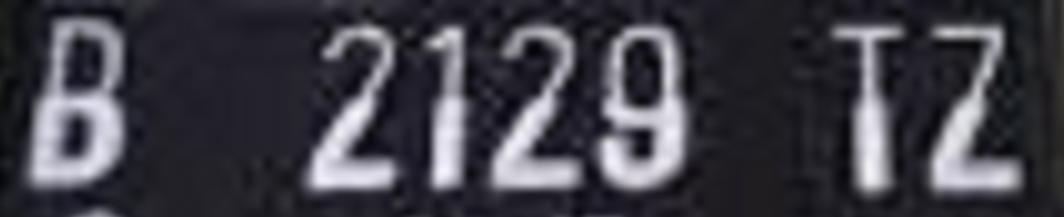

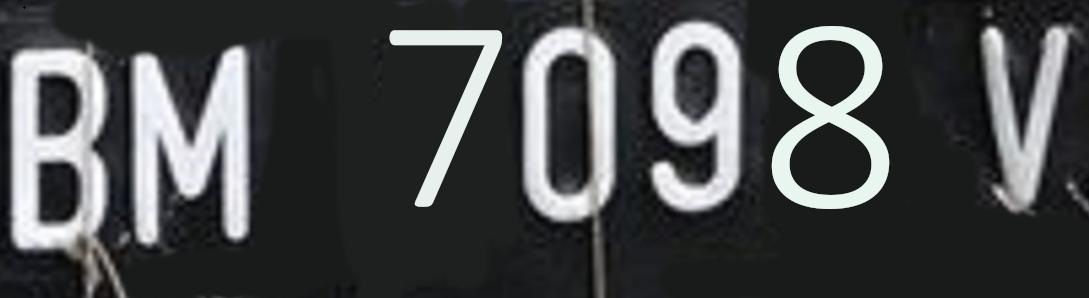

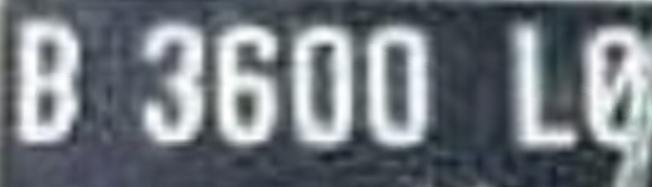

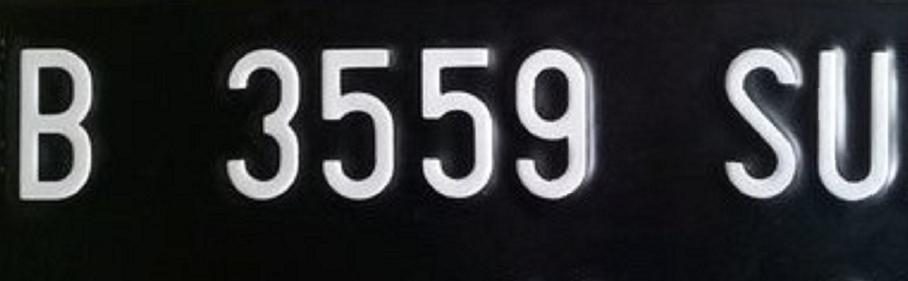

In [6]:
import random

reshaped_images = []

for image in cv_img[-5:]:
  img = cv2.imread(image)
  # Mendapatkan dimensi gambar
  h, w, ch = img.shape
  # Reshape gambar
  data = img / 255.0
  data = data.reshape(h * w, ch)
  # Menambahkan gambar yang sudah direshape ke dalam list
  reshaped_images.append(data)
  # Tampilkan gambar jika Anda inginkan
  cv2_imshow(img)

In [7]:

# Jika Anda ingin mencetak bentuk dari setiap gambar yang sudah direshape
for i, data in enumerate(reshaped_images):
    print(f"Nama File: {cv_img[i]}")
    print(f"Bentuk gambar yang sudah direshape: {data.shape}")

Nama File: /content/drive/MyDrive/dummy/BG6988A_png.rf.3ffe7b77f6e8a4a01bba0caf1f8abc96.jpg
Bentuk gambar yang sudah direshape: (405769, 3)
Nama File: /content/drive/MyDrive/dummy/22-E-5234-YF-11-20_jpeg.rf.4e1ab567405d90ef53329797f1f6dab5.jpg
Bentuk gambar yang sudah direshape: (230888, 3)
Nama File: /content/drive/MyDrive/dummy/BM45558Q_PNG.rf.336f13e66b098cd37be10ac1ede207e9.jpg
Bentuk gambar yang sudah direshape: (324522, 3)
Nama File: /content/drive/MyDrive/dummy/BA5757Y_png.rf.e4e7557f9e1bff8c2d6d1b986714f6ea.jpg
Bentuk gambar yang sudah direshape: (121924, 3)
Nama File: /content/drive/MyDrive/dummy/B2520XK_PNG.rf.4e22939a8917f509074397176d67c5e5.jpg
Bentuk gambar yang sudah direshape: (255148, 3)


In [8]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

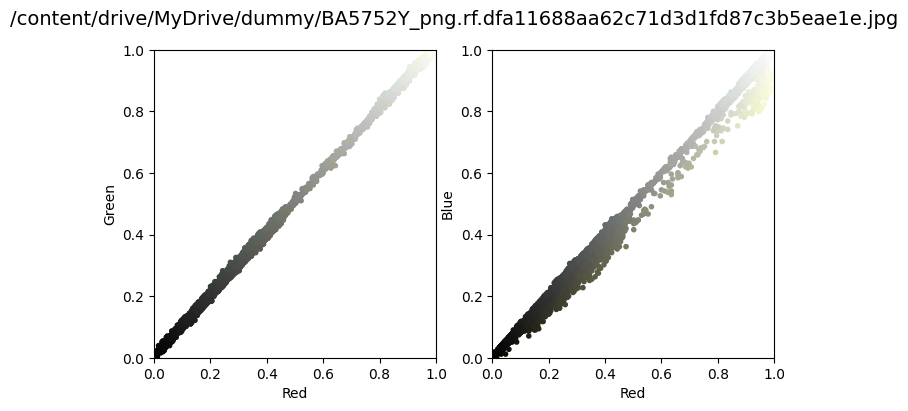

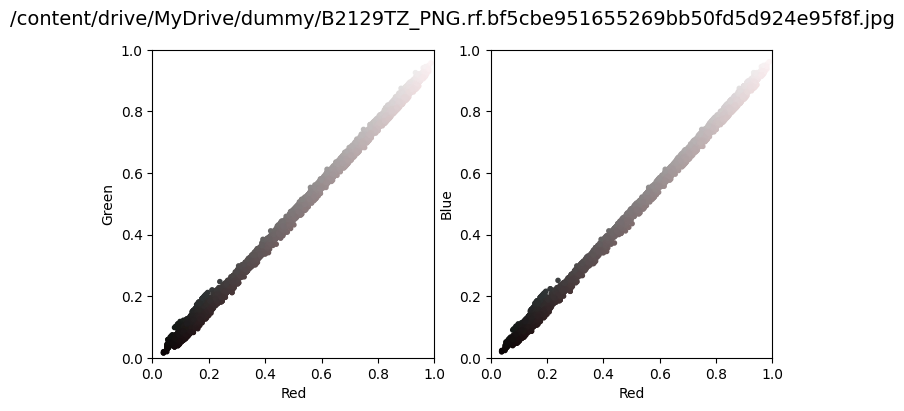

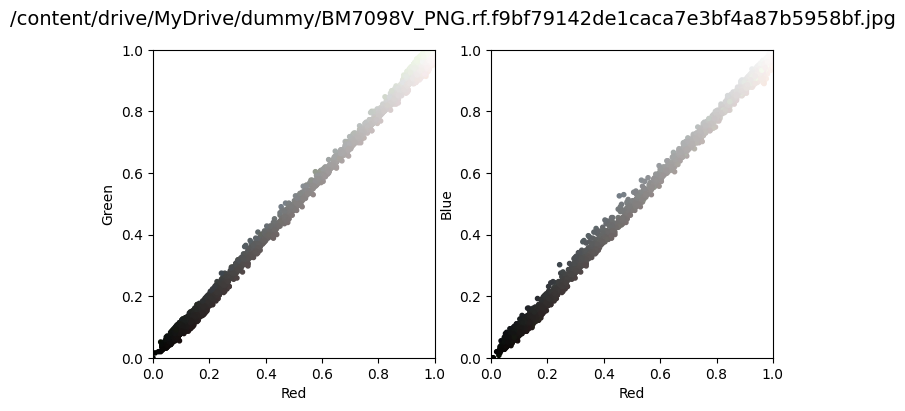

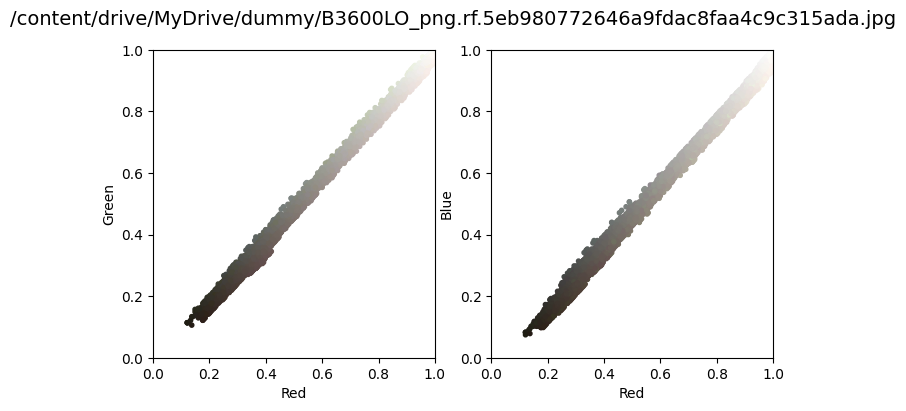

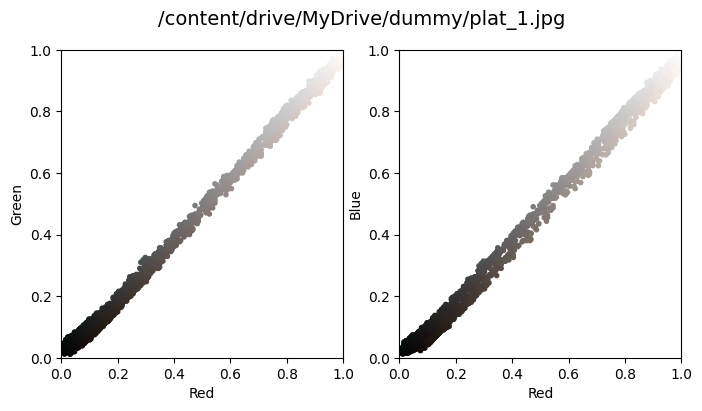

In [9]:

for image in cv_img[-5:]:

  # Baca gambar
  img = cv2.imread(image)
  # Mendapatkan dimensi gambar
  h, w, ch = img.shape
  # Reshape gambar
  data = img / 255.0
  data = data.reshape(h * w, ch)
  # Memanggil fungsi plot_pixels untuk menganalisis persebaran warna
  plot_pixels(data,title=image)

plt.show()  # Menampilkan plot untuk semua gambar

In [10]:
pip install pytesseract

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


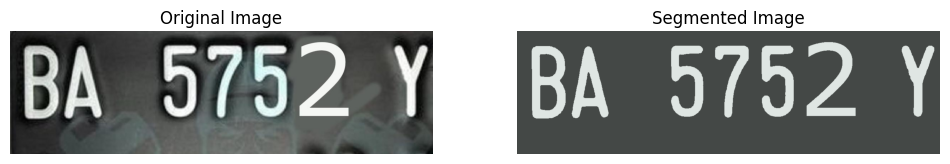

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


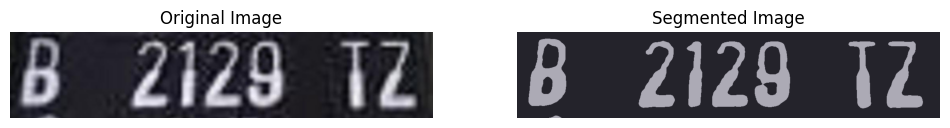

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


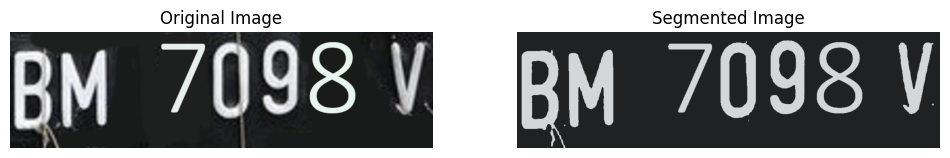

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


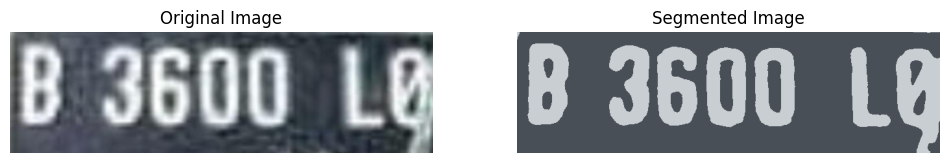

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


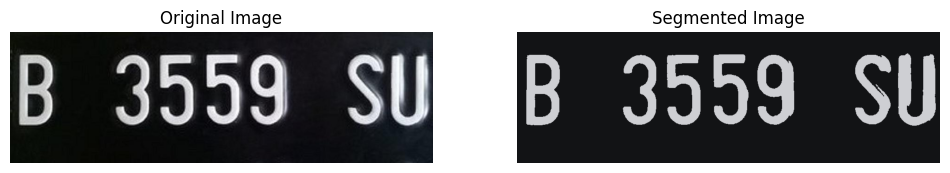

In [17]:
from sklearn.cluster import KMeans
for image in cv_img[-5:]:

  # Baca gambar
  img = cv2.imread(image)
  # Mendapatkan dimensi gambar
  h, w, ch = img.shape

  data = img.reshape(-1, 3)

  # Inisiasi obyek KMeans
  cl_kmeans = KMeans(n_clusters=2, random_state=0)
  # Fit dan predict model
  y_kmeans = cl_kmeans.fit_predict(data)
  centers = cl_kmeans.cluster_centers_
  # Ganti warna gambar asli dengan warna yang dihasilkan oleh K-Means Clustering
  new_img = centers[y_kmeans].reshape(img.shape).astype(np.uint8)
  # Simpan hasil segmentasi
  # output_path = os.path.join(output_segmentation_directory, filename)
  # cv2.imwrite(output_path, new_img)
  # Tampilkan gambar asli dan hasil segmentasi
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title(f"Original Image")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.subplot(1, 2, 2)
  plt.title(f"Segmented Image")
  plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.show()

In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


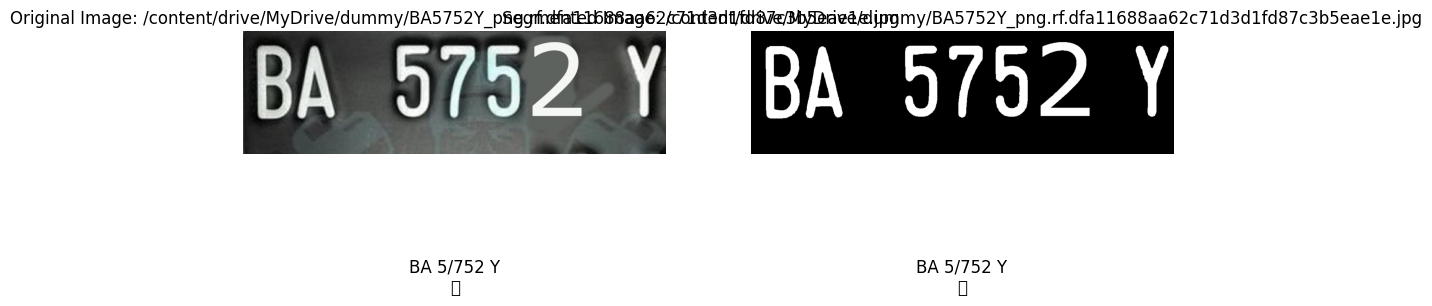

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


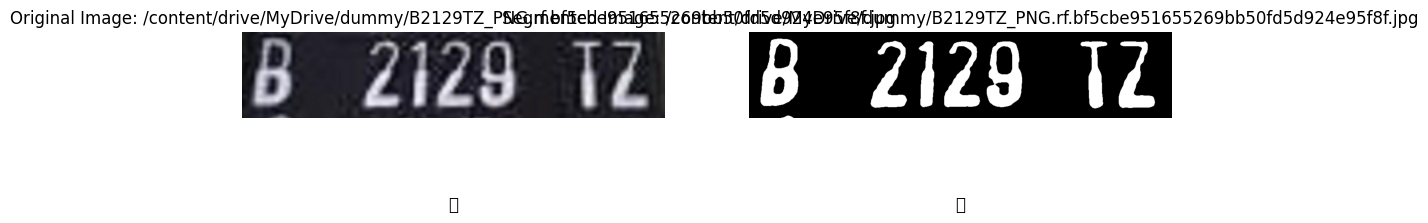

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


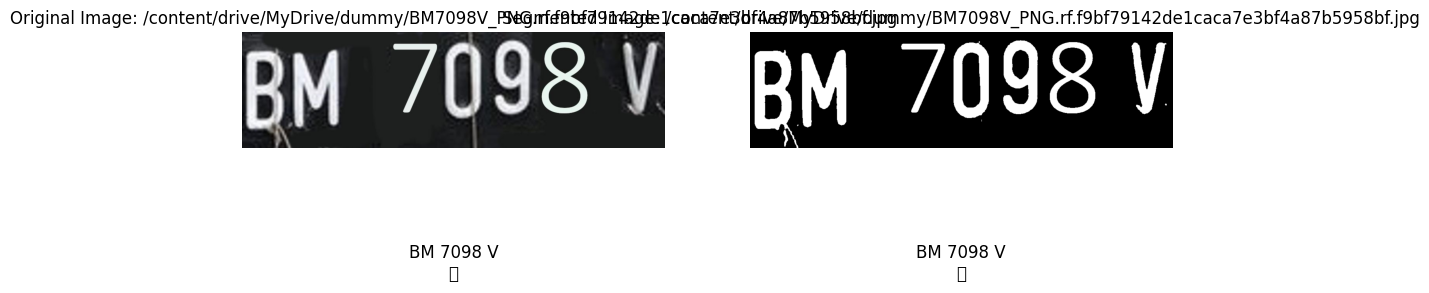

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


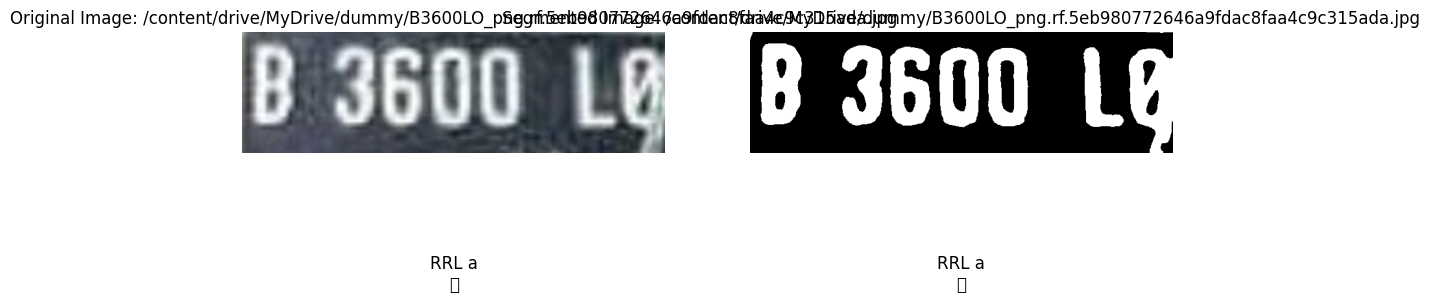

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


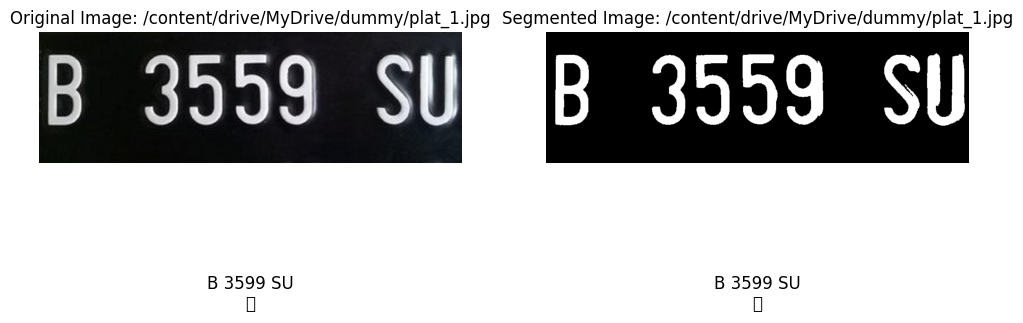

In [15]:
import pytesseract
for image in cv_img[-5:]:

  # Baca gambar
  img = cv2.imread(image)
  # Mendapatkan dimensi gambar
  h, w, ch = img.shape

  data = img.reshape(-1, 3)

  # Inisiasi obyek KMeans
  cl_kmeans = KMeans(n_clusters=2, random_state=0)
  # Fit dan predict model
  y_kmeans = cl_kmeans.fit_predict(data)
  centers = cl_kmeans.cluster_centers_
  # Ganti warna gambar asli dengan warna yang dihasilkan oleh K-Means Clustering
  new_img = centers[y_kmeans].reshape(img.shape).astype(np.uint8)

  # Simpan hasil segmentasi biner

  gray_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
  _, binary_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)

  text = pytesseract.image_to_string(binary_img)


  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title(f"Original Image: {image}")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  text = pytesseract.image_to_string(img)
  plt.text(0.5, -1, text, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.subplot(1, 2, 2)
  plt.title(f"Segmented Image: {image}")
  plt.imshow(cv2.cvtColor(binary_img, cv2.COLOR_BGR2RGB))
  plt.text(0.5, -1, text, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='black')
  plt.axis('off')  # Sembunyikan sumbu gambar
  plt.show()